In [106]:
R.version

               _                           
platform       x86_64-apple-darwin17.0     
arch           x86_64                      
os             darwin17.0                  
system         x86_64, darwin17.0          
status                                     
major          4                           
minor          0.5                         
year           2021                        
month          03                          
day            31                          
svn rev        80133                       
language       R                           
version.string R version 4.0.5 (2021-03-31)
nickname       Shake and Throw             

In [107]:
library(qiime2R)
library(tidyr)
library(tibble)
library(ggplot2)
library(vegan)
library(microbiome)
library(phyloseq)
library(dplyr)

In [108]:
#rm(, large_list, large_vector, temp_variables)

In [109]:
# Read in the 16S qza files and clean them up for phyloseq
ASVtable_16S <- read_qza("/Users/stephanie.rosales/Documents/Tissueloss/SCTLD_MetaAnalysis/QiimeOutPut/2022_Process/tableV_BacArc_99_SCTLD.qza")
ASVtable_16S <- ASVtable_16S$data # Extract the count data from list
ASVtaxa_16S <- read_qza("/Users/stephanie.rosales/Documents/Tissueloss/SCTLD_MetaAnalysis/QiimeOutPut/2022_Process/taxaVsearch_rep-seqs-dn-99_SCTLD.qza")
taxtable_16S <- ASVtaxa_16S$data %>% as_tibble() %>% separate(Taxon, sep=";",
c("Kingdom", "Phylum", "Class", "Order", "Family", "Genus", "Species")) 
# Convert taxonomy info to data frame with correct taxonomy labels
taxtable_16S <- taxtable_16S[-1,]
#asv_tab$asv_id <- rownames(asv_tab) # add a new column for ids




Warning message:
“Expected 7 pieces. Missing pieces filled with `NA` in 70468 rows [2, 7, 11, 13, 15, 17, 21, 23, 27, 29, 34, 38, 39, 41, 43, 46, 47, 50, 54, 56, ...].”


In [110]:
sample_info_tab_16S <- read.csv("/Users/stephanie.rosales/Documents/Tissueloss/SCTLD_MetaAnalysis/metadata_for_qiime/SCTLD_meta_analysis_metadata.csv", header = T, row.names = 1,
na.strings = c("", "NA"))

In [111]:
physeq_16S <- phyloseq(otu_table(ASVtable_16S, taxa_are_rows= T),
tax_table(as.data.frame(taxtable_16S) %>% column_to_rownames("Feature.ID") %>%
as.matrix()), sample_data(sample_info_tab_16S))
physeq_16S
#taxa_names(physeq_16S) <- paste0("ASV", seq(ntaxa(physeq_16S)))

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 119456 taxa and 2425 samples ]
sample_data() Sample Data:       [ 2425 samples by 61 sample variables ]
tax_table()   Taxonomy Table:    [ 119456 taxa by 8 taxonomic ranks ]

In [112]:
sub_samples = c("TissueSlurry", "Mucus", "TissueSlurry_Skeleton", "Seawater", "Sediment")

sub_samples2 = c("TissueSlurry", "Mucus", "TissueSlurry_Skeleton")

ps.coral =subset_samples(physeq_16S, sample_type %in% sub_samples2 
                       )

ps.coral

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 119456 taxa and 2031 samples ]
sample_data() Sample Data:       [ 2031 samples by 61 sample variables ]
tax_table()   Taxonomy Table:    [ 119456 taxa by 8 taxonomic ranks ]

In [113]:
ps.coral = filter_taxa(ps.coral, function(x) sum(x > 20) > (0.015*length(x)), TRUE)
ps.coral
  
                 


phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 2292 taxa and 2031 samples ]
sample_data() Sample Data:       [ 2031 samples by 61 sample variables ]
tax_table()   Taxonomy Table:    [ 2292 taxa by 8 taxonomic ranks ]

In [114]:
ps.coral_clr <- microbiome::transform(ps.coral, 'clr')


In [115]:
ps.coral_clr.ord <- ordinate(ps.coral_clr, "RDA", "euclidean")


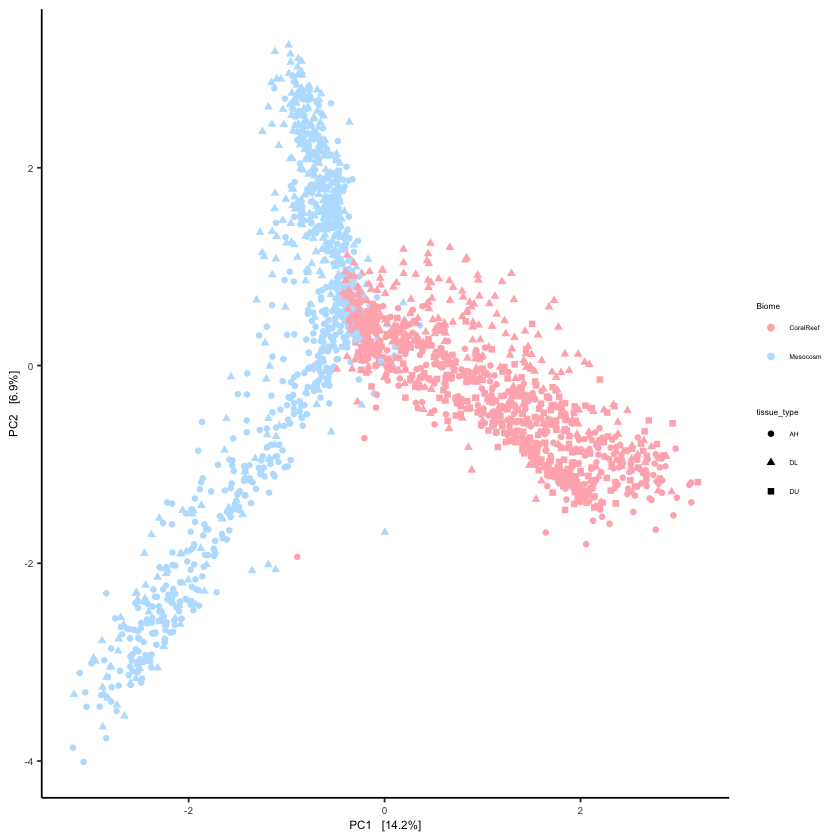

In [116]:
ord_biome = plot_ordination(ps.coral_clr, ps.coral_clr.ord,
                               color="Biome",
                               shape="tissue_type",
                               axes = c(1,2)) +
theme_classic() +
scale_color_manual(values=c("#ffb3ba", "#bae1ff", "#957DAD", "lightsalmon",  
                           
                           "#F9D4A4", 
                            "#89C4C2",
                        
                           "gray80", 
                           "#D1A33D",
                           "lightblue4", "lightpink", "ivory4","royalblue4", "darkorchid", 
                           "palevioletred1", "#56B4E9","#CBD588","yellow2","#5F7FC7", "orange","#DA5724",
                            "gray80",
                           "#AD6F3B", "#673770")) +
theme(legend.text =element_text(size=4)) +
theme(legend.title = element_text(size=5)) +
theme(axis.title.x = element_text(size = 7)) +
theme(axis.title.y = element_text(size = 7)) +
theme(axis.text.x = element_text(size =6)) +
theme(axis.text.y = element_text(size =6))



#stat_ellipse()
ord_biome

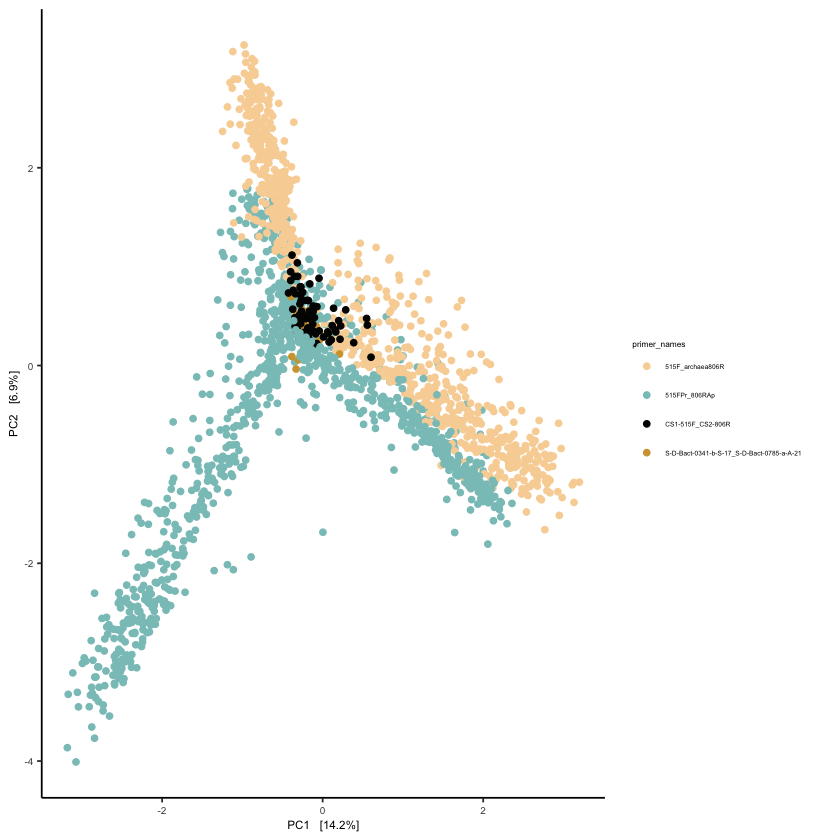

In [117]:





ord_primer= plot_ordination(ps.coral_clr, ps.coral_clr.ord,
                               color="primer_names",
                               axes = c(1,2)) +

theme_classic() +
scale_color_manual(values=c( 
                           
                           "#F9D4A4", 
                            "#89C4C2",
                        
                           "gray1", 
                           "#D1A33D",
                           "lightblue4", "lightpink", "ivory4","royalblue4", "darkorchid", 
                           "palevioletred1", "#56B4E9","#CBD588","yellow2","#5F7FC7", "orange","#DA5724",
                            "gray80",
                           "#AD6F3B", "#673770")) +
theme(legend.text =element_text(size=4)) +
theme(legend.title = element_text(size=5)) +
theme(axis.title.x = element_text(size = 7)) +
theme(axis.title.y = element_text(size = 7)) +
theme(axis.text.x = element_text(size =6)) +
theme(axis.text.y = element_text(size =6))

ord_primer

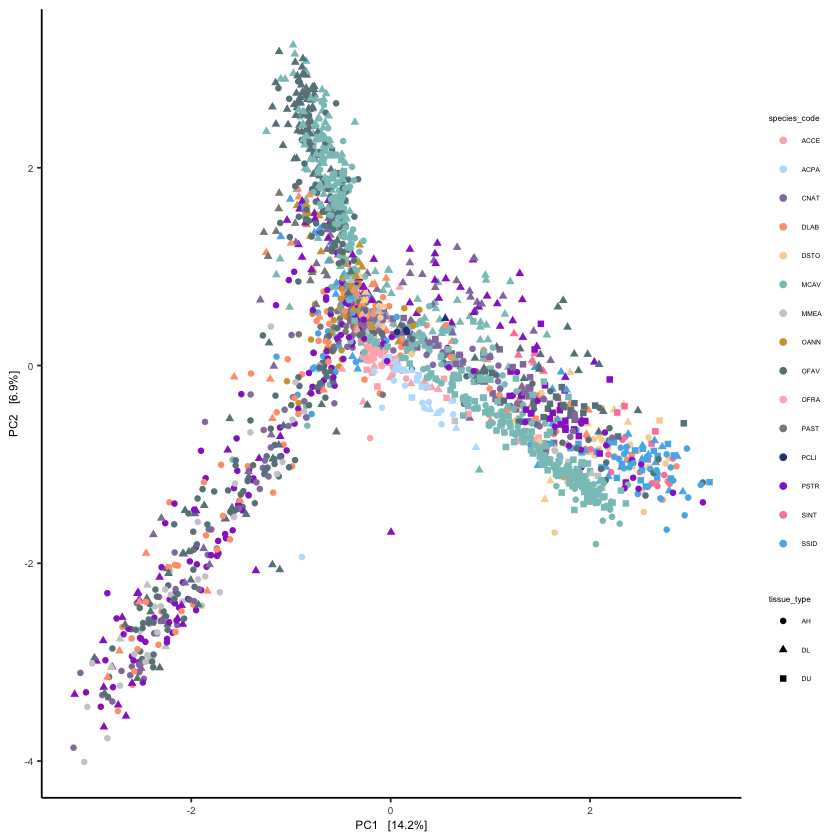

In [118]:
ord_species=plot_ordination(ps.coral_clr, ps.coral_clr.ord,
                               color="species_code",
                              shape="tissue_type", axes = c(1,2)) +
theme_classic() +
scale_color_manual(values=c("#ffb3ba", "#bae1ff", "#957DAD", "lightsalmon",  
                           
                           "#F9D4A4", 
                            "#89C4C2",
                        
                           "gray80", 
                           "#D1A33D",
                           "lightblue4", "lightpink", "ivory4","royalblue4", "darkorchid", 
                           "palevioletred1", "#56B4E9","#CBD588","yellow2","#5F7FC7", "orange","#DA5724",
                            "gray80",
                           "#AD6F3B", "#673770")) +
theme(legend.text =element_text(size=4)) +
theme(legend.title = element_text(size=5)) +
theme(axis.title.x = element_text(size = 7)) +
theme(axis.title.y = element_text(size = 7)) +
theme(axis.text.x = element_text(size =6)) +
theme(axis.text.y = element_text(size =6))

ord_species

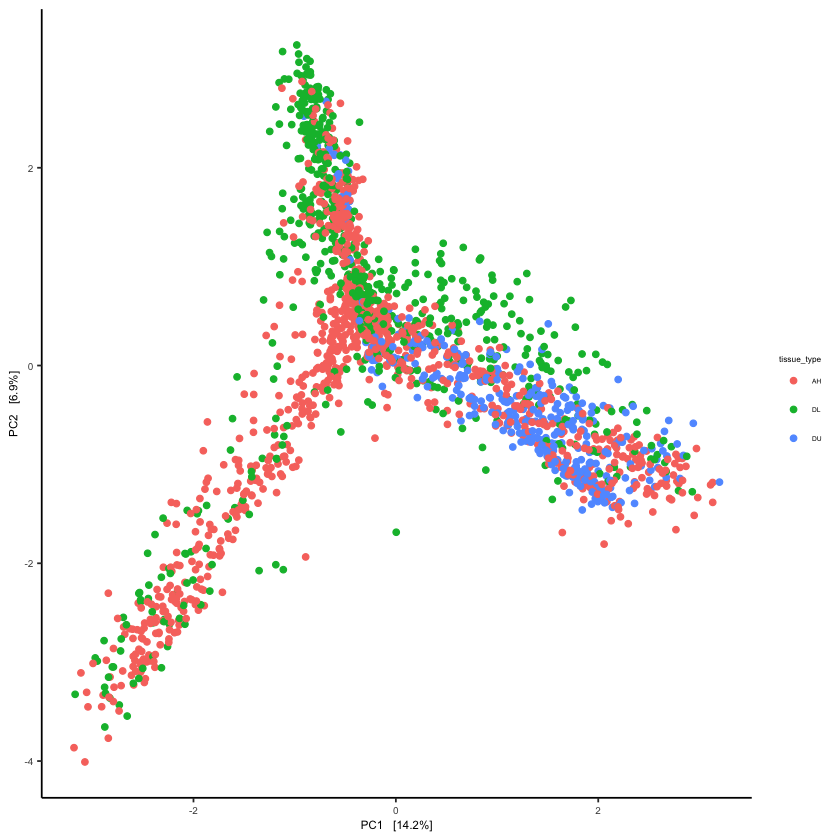

In [119]:

ord_tissue=plot_ordination(ps.coral_clr, ps.coral_clr.ord,

                               color="tissue_type",
                               axes = c(1,2)) +
theme_classic() +
theme(legend.text =element_text(size=4)) +
theme(legend.title = element_text(size=5)) +
theme(axis.title.x = element_text(size = 7)) +
theme(axis.title.y = element_text(size = 7)) +
theme(axis.text.x = element_text(size =6)) +
theme(axis.text.y = element_text(size =6))

ord_tissue

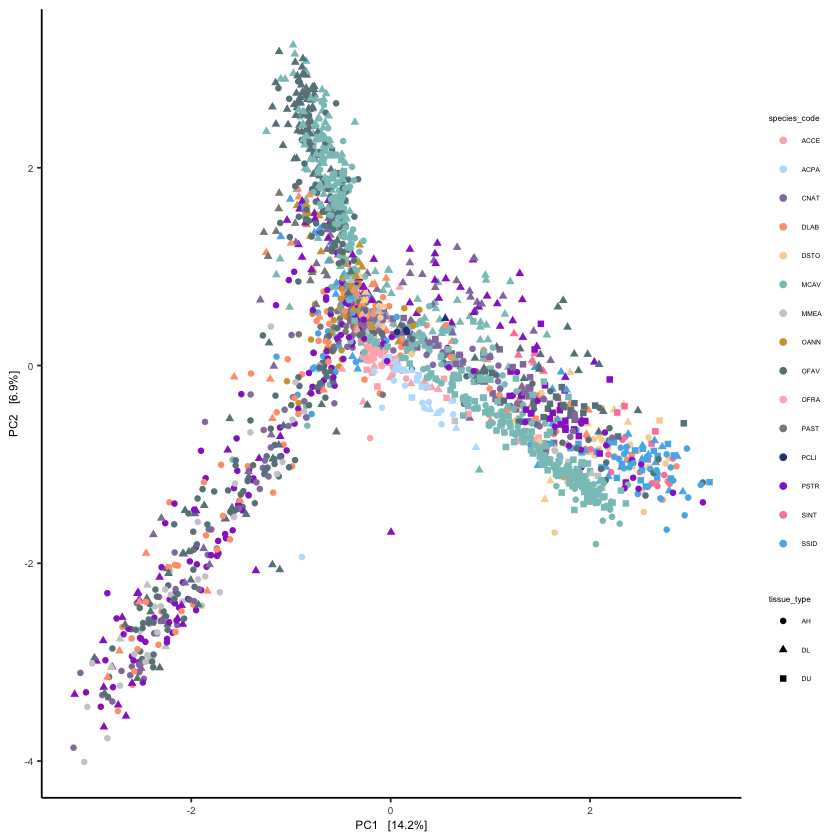

In [120]:
ord_species= plot_ordination(ps.coral_clr, ps.coral_clr.ord,
                               color="species_code", shape="tissue_type",
                               axes = c(1,2)) +
theme_classic() +
theme(legend.text =element_text(size=4)) +
theme(legend.title = element_text(size=5)) +
theme(axis.title.x = element_text(size = 7)) +
theme(axis.title.y = element_text(size = 7)) +
theme(axis.text.x = element_text(size =6)) +
theme(axis.text.y = element_text(size =6)) +

scale_color_manual(values=c("#ffb3ba", "#bae1ff", "#957DAD", "lightsalmon",  
                           
                           "#F9D4A4", 
                            "#89C4C2",
                        
                           "gray80", 
                           "#D1A33D",
                           "lightblue4", "lightpink", "ivory4","royalblue4", "darkorchid", 
                           "palevioletred1", "#56B4E9","#CBD588","yellow2","#5F7FC7", "orange","#DA5724",
                            "gray80",
                           "#AD6F3B", "#673770"))

ord_species

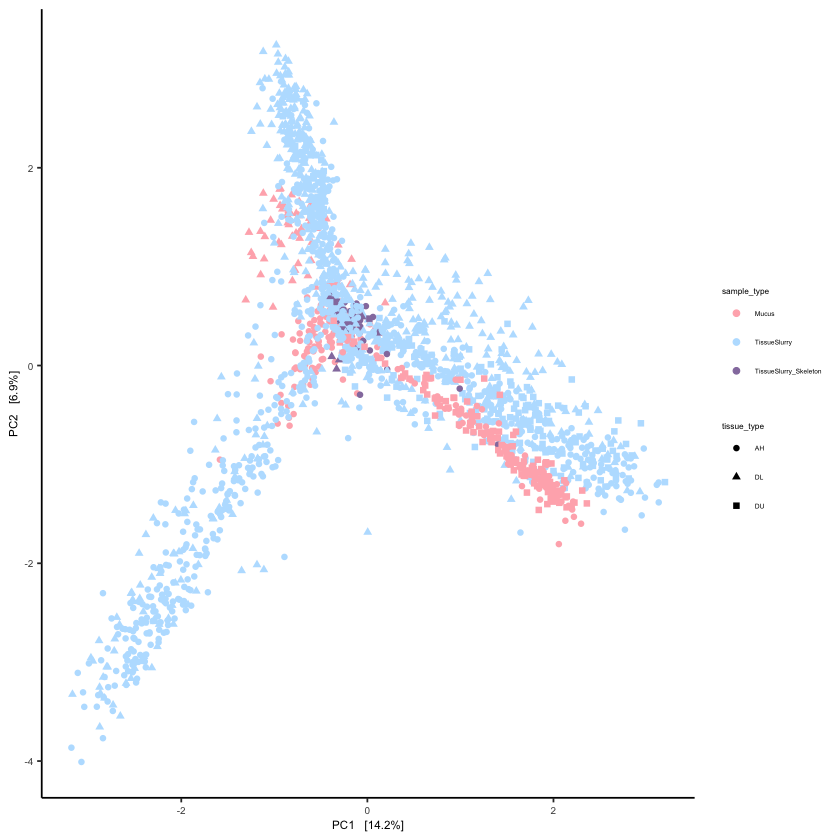

In [121]:
ord_type= plot_ordination(ps.coral_clr, ps.coral_clr.ord,
                               color="sample_type", shape="tissue_type",
                               axes = c(1,2)) +
theme_classic() +
theme(legend.text =element_text(size=4)) +
theme(legend.title = element_text(size=5)) +
theme(axis.title.x = element_text(size = 7)) +
theme(axis.title.y = element_text(size = 7)) +
theme(axis.text.x = element_text(size =6)) +
theme(axis.text.y = element_text(size =6)) +

scale_color_manual(values=c("#ffb3ba", "#bae1ff", "#957DAD", "lightsalmon",  
                           
                           "#F9D4A4", 
                            "#89C4C2",
                        
                           "gray80", 
                           "#D1A33D",
                           "lightblue4", "lightpink", "ivory4","royalblue4", "darkorchid", 
                           "palevioletred1", "#56B4E9","#CBD588","yellow2","#5F7FC7", "orange","#DA5724",
                            "gray80",
                           "#AD6F3B", "#673770"))

ord_type

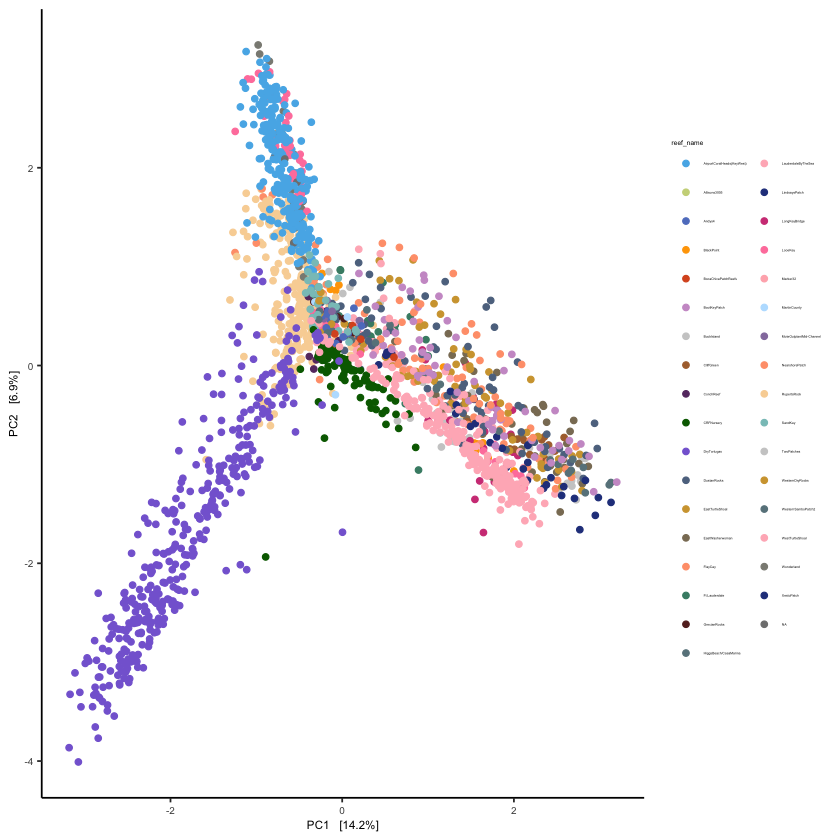

In [122]:
ord_reef=plot_ordination(ps.coral_clr, ps.coral_clr.ord,
                               color="reef_name",
                               axes = c(1,2)) +
theme_classic() +
theme(legend.text =element_text(size=2)) +
theme(legend.title = element_text(size=4)) +
theme(axis.title.x = element_text(size = 7)) +
theme(axis.title.y = element_text(size = 7)) +
theme(axis.text.x = element_text(size =6)) +
theme(axis.text.y = element_text(size =6)) +
scale_color_manual(values=c("#56B4E9","#CBD588","#5F7FC7", "orange","#DA5724","#CD9BCD",
                           "gray80", "#AD6F3B", "#673770","#006700","#8569D5", 
                           "#5E738F","#D1A33D", "#8A7C64","lightsalmon","aquamarine4", "#652926",
                           "lightblue4", "lightpink","royalblue4","#D14285",
                           "palevioletred1", "#ffb3ba", "#bae1ff", "#957DAD", "lightsalmon",  
                           
                           "#F9D4A4", 
                            "#89C4C2",
                        
                           "gray80", 
                           "#D1A33D",
                           "lightblue4", "lightpink", "ivory4","royalblue4", "darkorchid", 
                           "palevioletred1", "#56B4E9","#CBD588","yellow2","#5F7FC7", "orange","#DA5724",
                            "gray80",
                           "#AD6F3B", "#673770"))


ord_reef

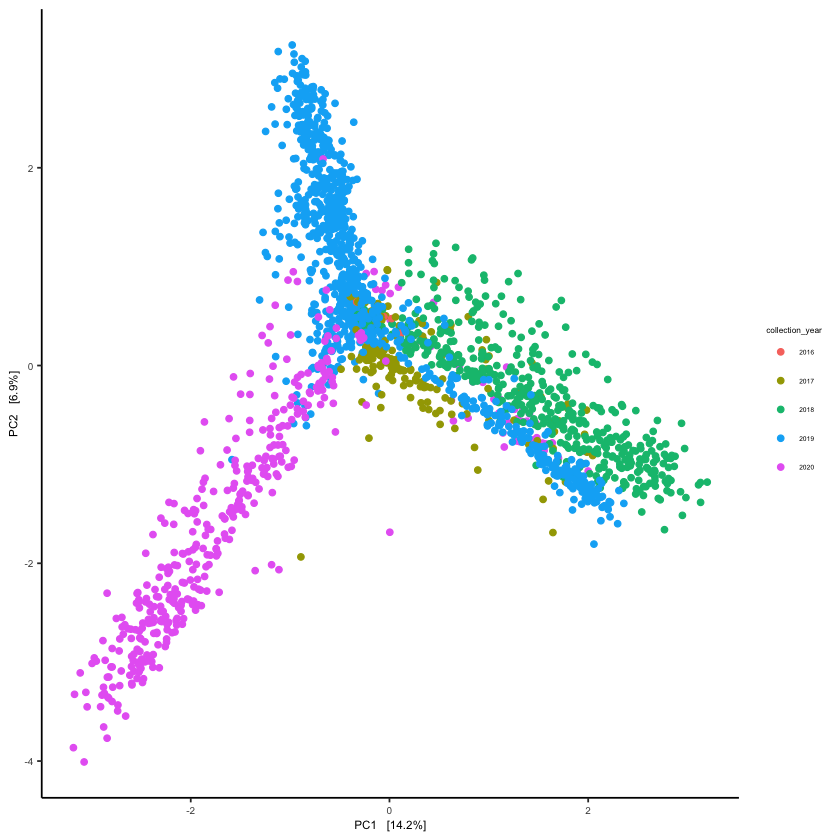

In [123]:
ord_year = plot_ordination(ps.coral_clr, ps.coral_clr.ord,
                               color="collection_year",
                               axes = c(1,2)) +
theme_classic() +
theme(legend.text =element_text(size=4)) +
theme(legend.title = element_text(size=5)) +
theme(axis.title.x = element_text(size = 7)) +
theme(axis.title.y = element_text(size = 7)) +
theme(axis.text.x = element_text(size =6)) +
theme(axis.text.y = element_text(size =6))

ord_year

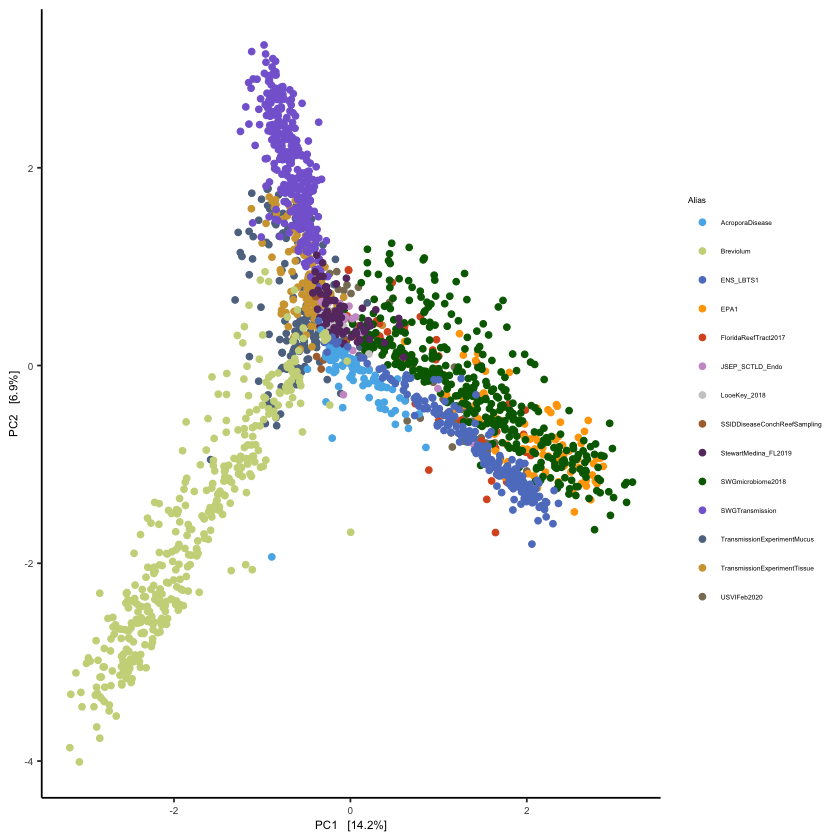

In [124]:
ord_alias= plot_ordination(ps.coral_clr, ps.coral_clr.ord,
                               color="Alias",
                               axes = c(1,2)) +
theme_classic() +
theme(legend.text =element_text(size=4)) +
theme(legend.title = element_text(size=5)) +
theme(axis.title.x = element_text(size = 7)) +
theme(axis.title.y = element_text(size = 7)) +
theme(axis.text.x = element_text(size =6)) +
theme(axis.text.y = element_text(size =6)) +

scale_color_manual(values=c("#56B4E9","#CBD588","#5F7FC7", "orange","#DA5724","#CD9BCD",
                           "gray80", "#AD6F3B", "#673770","#006700","#8569D5", 
                           "#5E738F","#D1A33D", "#8A7C64","lightsalmon","aquamarine4", "#652926",
                           "lightblue4", "lightpink","royalblue4","#D14285",
                           "palevioletred1", "#ffb3ba", "#bae1ff", "#957DAD", "lightsalmon",  
                           
                           "#F9D4A4", 
                            "#89C4C2",
                        
                           "gray80", 
                           "#D1A33D",
                           "lightblue4", "lightpink", "ivory4","royalblue4", "darkorchid", 
                           "palevioletred1", "#56B4E9","#CBD588","yellow2","#5F7FC7", "orange","#DA5724",
                            "gray80",
                           "#AD6F3B", "#673770"))

ord_alias

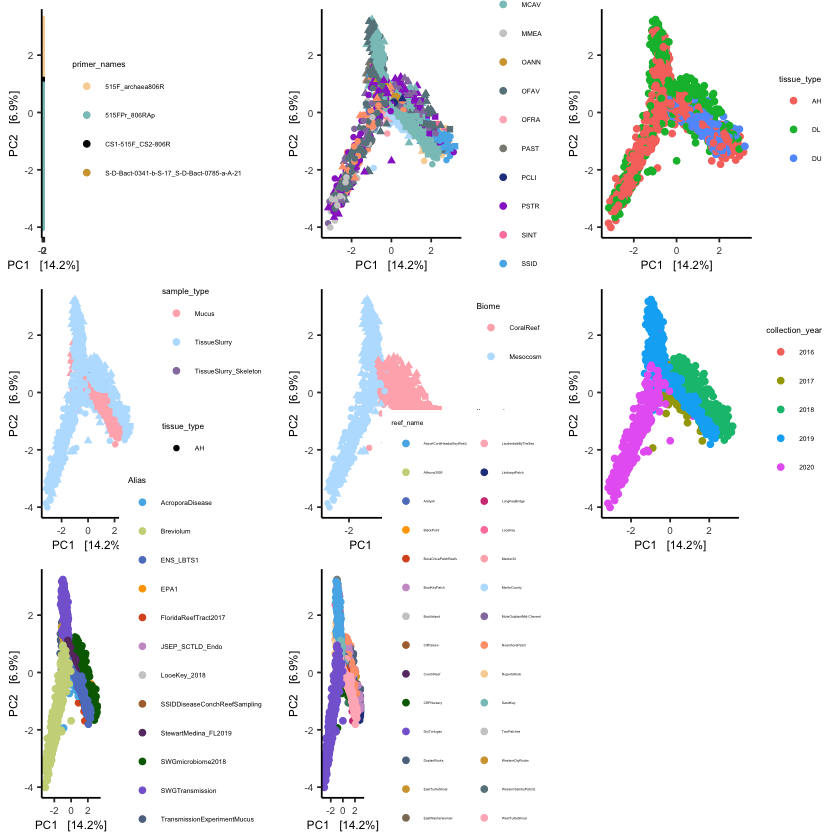

In [125]:
ggpubr::ggarrange(ord_primer, ord_species, ord_tissue, ord_type, ord_biome, ord_year, 
                  ord_alias, ord_reef, font.label = list(size = 7, color = "black"))
ggsave("/Users/stephanie.rosales/Documents/Tissueloss/SCTLD_MetaAnalysis/figs/ord_wAcer.png",
     width = 14, height = 14, units = "in", dpi=300)